In [14]:
library(ggplot2)
library(dplyr)
library(lme4)
library(lmerTest)
library(xtable)
library(glmmTMB)
library(cowplot)
library(grid)

pallete = c("#318480", "#b4464f")

# Bock 1992

In [15]:
b92_df <- read.csv("../evalsets/Bock1992/items.csv.reformat")
b92_df <- tidyr::separate(b92_df, condition, c("nums","clause"), sep="_")
b92_df <- tidyr::separate(b92_df, nums, c("subj", "attr"), sep=1:2)

b92_df$type <- as.factor(substr(b92_df$model, 5, 5))
b92_df$match <- as.factor(b92_df$subj == b92_df$attr)
b92_df$subj <- as.factor(b92_df$subj)
b92_df$clause <- as.factor(b92_df$clause)


coding_matrix <- matrix(c(1, -1), ncol=1)
contrasts(b92_df$match) <- coding_matrix
contrasts(b92_df$clause) <- coding_matrix
contrasts(b92_df$clause)
b92_df$sample <- 100 - b92_df$sample

b92_df$max <- 100 - b92_df$max
b92_df

means <- b92_df %>% group_by(model, type, match, clause) %>% summarize(sample = mean(sample), max = mean(max))

means_na <- b92_df %>% group_by(model, type, match, subj) %>% summarize(sample = mean(sample), max = mean(max))

means


prop,1
rc,-1


X,item,subj,attr,clause,model,max,sample,type,match
<int>,<int>,<fct>,<chr>,<fct>,<chr>,<dbl>,<dbl>,<fct>,<fct>
0,0,s,s,prop,lstmlmaug0,0,19.671707,l,TRUE
1,0,s,s,prop,lstmlmaug1,0,6.829084,l,TRUE
2,0,s,s,prop,lstmlmaug2,0,14.747381,l,TRUE
3,0,s,s,prop,lstmlmaug3,0,21.921008,l,TRUE
4,0,s,s,prop,lstmlmaug4,0,6.803114,l,TRUE
5,0,s,s,prop,lstmaugment0,0,10.362747,a,TRUE
6,0,s,s,prop,lstmaugment1,0,8.895047,a,TRUE
7,0,s,s,prop,lstmaugment2,0,13.153569,a,TRUE
8,0,s,s,prop,lstmaugment3,0,25.850701,a,TRUE


`summarise()` has grouped output by 'model', 'type', 'match'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'model', 'type', 'match'. You can override using the `.groups` argument.



model,type,match,clause,sample,max
<chr>,<fct>,<fct>,<fct>,<dbl>,<dbl>
lstmaugment0,a,FALSE,prop,56.975515,64.0625
lstmaugment0,a,FALSE,rc,58.132614,67.1875
lstmaugment0,a,TRUE,prop,17.234007,6.2500
lstmaugment0,a,TRUE,rc,17.169496,1.5625
lstmaugment1,a,FALSE,prop,54.334485,53.1250
lstmaugment1,a,FALSE,rc,59.570295,60.9375
lstmaugment1,a,TRUE,prop,14.114239,3.1250
lstmaugment1,a,TRUE,rc,14.709341,0.0000
lstmaugment2,a,FALSE,prop,47.765679,43.7500


In [16]:
output <- b92_df %>% group_by("Model Type"=type, "Subject #"=subj, "Attractor #"=attr, "Modifier Type"=clause) %>% summarize("Sample"=mean(sample), "MaxProb"=mean(max))

output
print.xtable(xtable(output), file="Bock92Table.tex", floating=FALSE)

`summarise()` has grouped output by 'Model Type', 'Subject #', 'Attractor #'. You can override using the `.groups` argument.



Model Type,Subject #,Attractor #,Modifier Type,Sample,MaxProb
<fct>,<fct>,<chr>,<fct>,<dbl>,<dbl>
a,p,p,prop,14.102522,1.875
a,p,p,rc,13.014364,0.625
a,p,s,prop,45.277617,42.500
a,p,s,rc,48.143379,46.250
a,s,p,prop,58.532296,65.625
a,s,p,rc,62.127105,68.125
a,s,s,prop,10.718935,1.875
a,s,s,rc,13.121231,0.625
l,p,p,prop,16.394342,0.625


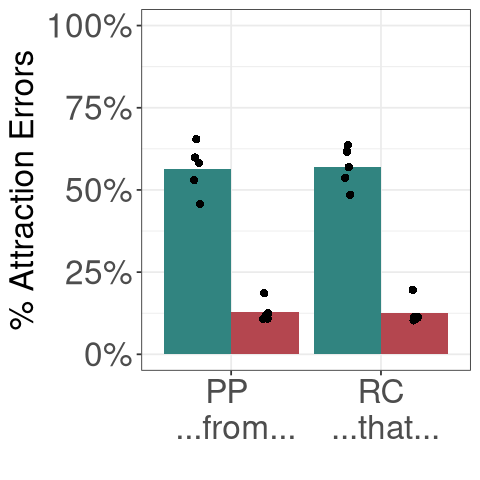

In [17]:
options(repr.plot.width=4, repr.plot.height=4)
f <- ggplot(subset(b92_df, type=="w"), aes(x=clause, fill=match, y=sample/100)) + 
geom_bar(stat="summary", position="dodge", fun=mean) + 
geom_point(data=subset(means, type=="w"), shape=16, size=2,
           position=position_jitterdodge(jitter.height=0, jitter.width = 0.1, dodge.width=0.9)) +
labs(x="", y="% Attraction Errors", fill="") +
theme_bw() +
scale_fill_manual(labels=c("Subj-Attr Mismatch \n  ...singers...", 
                        "Subj-Attr Match \n ...singer..."), values=pallete) +
scale_x_discrete(labels=c("PP \n ...from...", "RC\n ...that...")) +
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,1.0)) +
theme(axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20))
legend <- cowplot::get_legend(f)
f <-f + theme(legend.position = "none")
f
ggsave("Bock92_lm_wiki.png", width=4, height=4)

In [18]:
b92_lm <- glmmTMB(data=subset(b92_df, type=="w"), 
                  sample/100 ~ subj * match * clause + (1 | item) + (1 | model),
                 family=beta_family())
summary(b92_lm)

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


 Family: beta  ( logit )
Formula:          sample/100 ~ subj * match * clause + (1 | item) + (1 | model)
Data: subset(b92_df, type == "w")

     AIC      BIC   logLik deviance df.resid 
 -1865.3  -1808.6    943.6  -1887.3     1269 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.04879  0.2209  
 model  (Intercept) 0.04080  0.2020  
Number of obs: 1280, groups:  item, 32; model, 5

Overdispersion parameter for beta family (): 9.91 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -0.851217   0.102343   -8.32  < 2e-16 ***
subjs                 0.160782   0.039202    4.10 4.11e-05 ***
match1                0.936318   0.028240   33.16  < 2e-16 ***
clause1              -0.054055   0.027386   -1.97   0.0484 *  
subjs:match1          0.220690   0.039398    5.60 2.12e-08 ***
subjs:clause1         0.115027   0.039146    2.94   0.0033 ** 
match1:clause1        0.008357   0.027384    0.31   0.7

# Haskell & Macdonald 2011

In [19]:
hm_df <- read.csv("../evalsets/HaskellMacdonald2011/items.csv.reformat")

hm_df$type <- substr(hm_df$model,5, 5)
hm_df$type <- as.factor(hm_df$type)
hm_df$condition <- as.factor(hm_df$condition)

contrasts(hm_df$condition)

coding_matrix <- matrix(c(1, -1), ncol=1)
contrasts(hm_df$condition) <- coding_matrix
hm_df

,SP
PS,0
SP,1


X,item,condition,model,max,sample,type
<int>,<int>,<fct>,<chr>,<int>,<dbl>,<fct>
0,0,SP,lstmlmaug0,100,63.14754,l
1,0,SP,lstmlmaug1,100,96.87451,l
2,0,SP,lstmlmaug2,100,89.00968,l
3,0,SP,lstmlmaug3,100,97.68149,l
4,0,SP,lstmlmaug4,100,98.83878,l
5,0,SP,lstmaugment0,100,95.45648,a
6,0,SP,lstmaugment1,100,99.32236,a
7,0,SP,lstmaugment2,100,99.16819,a
8,0,SP,lstmaugment3,100,98.91358,a


In [20]:
output <- hm_df %>% group_by("Model Type"=type, "Order"=condition) %>% summarize("Sample"=mean(sample), "MaxProb" = mean(max))

output

print.xtable(xtable(output), file="HaskellTable.tex", floating=FALSE)

`summarise()` has grouped output by 'Model Type'. You can override using the `.groups` argument.



Model Type,Order,Sample,MaxProb
<fct>,<fct>,<dbl>,<dbl>
a,PS,70.60683,82.5
a,SP,90.06662,98.5
l,PS,78.03385,93.5
l,SP,89.86236,100.0
w,PS,80.84489,95.0
w,SP,87.85675,97.0


`summarise()` has grouped output by 'model', 'condition'. You can override using the `.groups` argument.



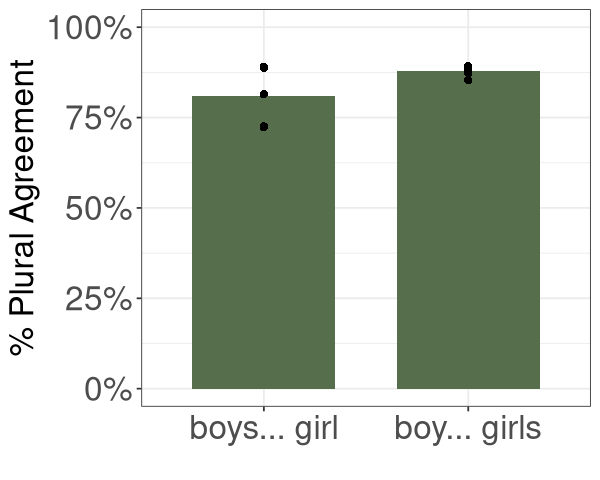

In [21]:
options(repr.plot.width=5, repr.plot.height=4)


means <- hm_df %>% group_by(model, condition, type) %>% summarize(sample = mean(sample), max = mean(max))


ggplot(subset(hm_df, type=="w"), aes(x=condition, y=sample/100)) + 
geom_bar(stat="summary", position="dodge", fun=mean, fill="#566e4b", width=0.7) + 
geom_point(data=subset(means, type=="w"), shape=16, size=2) +
labs(x="", y="% Plural Agreement") +
theme_bw() + 
scale_x_discrete(labels=c("boys... girl", "boy... girls")) + 
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,1)) +
theme(axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20))+
theme(legend.position = "none")

ggsave("Haskell_lm_wiki.png", width= 5, height = 4)

In [22]:
hm_lm <- glmmTMB(data=subset(hm_df, hm_df$type == "w"), 
                 sample/100 ~ condition  + (1|item) + (1 | model),
                family=beta_family())

summary(hm_lm)


Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


 Family: beta  ( logit )
Formula:          sample/100 ~ condition + (1 | item) + (1 | model)
Data: subset(hm_df, hm_df$type == "w")

     AIC      BIC   logLik deviance df.resid 
  -734.5   -714.5    372.2   -744.5      395 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.15654  0.3956  
 model  (Intercept) 0.07936  0.2817  
Number of obs: 400, groups:  item, 40; model, 5

Overdispersion parameter for beta family (): 9.92 

Conditional model:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.71294    0.14726  11.632  < 2e-16 ***
condition1  -0.23826    0.03926  -6.068 1.29e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Franck 2002

In [23]:
franck_df <- read.csv('../evalsets/Franck2002/items.csv.reformat')

franck_df <- tidyr::separate(franck_df, condition, c("subj", "inter", "local"), sep=1:3)
franck_df$sample <- 100 - franck_df$sample
franck_df$max <- 100 - franck_df$max

franck_df$inter_match <- as.factor(franck_df$subj == franck_df$inter)
franck_df$local_match <- as.factor(franck_df$subj == franck_df$local)
franck_df$type = as.factor(substr(franck_df$model, 5, 5))


contrasts(franck_df$local_match) <- coding_matrix
contrasts(franck_df$inter_match) <- coding_matrix

franck_lm_df = subset(franck_df, substr(franck_df$model, 5,5) == "w")
franck_df
summary(franck_df)
franck_df$type

X,item,subj,inter,local,model,max,sample,inter_match,local_match,type
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<fct>,<fct>
0,0,S,S,S,lstmlmaug0,0,10.291599,TRUE,TRUE,l
1,0,S,S,S,lstmlmaug1,0,6.067443,TRUE,TRUE,l
2,0,S,S,S,lstmlmaug2,0,12.414279,TRUE,TRUE,l
3,0,S,S,S,lstmlmaug3,0,9.579043,TRUE,TRUE,l
4,0,S,S,S,lstmlmaug4,0,4.763514,TRUE,TRUE,l
5,0,S,S,S,lstmaugment0,0,5.385856,TRUE,TRUE,a
6,0,S,S,S,lstmaugment1,0,5.387100,TRUE,TRUE,a
7,0,S,S,S,lstmaugment2,0,4.588738,TRUE,TRUE,a
8,0,S,S,S,lstmaugment3,0,6.543597,TRUE,TRUE,a


       X               item           subj              inter          
 Min.   :   0.0   Min.   : 0.00   Length:3840        Length:3840       
 1st Qu.: 959.8   1st Qu.: 7.75   Class :character   Class :character  
 Median :1919.5   Median :15.50   Mode  :character   Mode  :character  
 Mean   :1919.5   Mean   :15.50                                        
 3rd Qu.:2879.2   3rd Qu.:23.25                                        
 Max.   :3839.0   Max.   :31.00                                        
    local              model                max             sample       
 Length:3840        Length:3840        Min.   :  0.00   Min.   : 0.2786  
 Class :character   Class :character   1st Qu.:  0.00   1st Qu.:12.7457  
 Mode  :character   Mode  :character   Median :  0.00   Median :28.1337  
                                       Mean   : 27.76   Mean   :34.1817  
                                       3rd Qu.:100.00   3rd Qu.:53.1439  
                                       Max.   :100.0

[1] l l l l l a a a a a w w w w w l l l l l a a a a a w w w w w l l l l l a a
  [38] a a a w w w w w l l l l l a a a a a w w w w w l l l l l a a a a a w w w w
  [75] w l l l l l a a a a a w w w w w l l l l l a a a a a w w w w w l l l l l a
 [112] a a a a w w w w w l l l l l a a a a a w w w w w l l l l l a a a a a w w w
 [149] w w l l l l l a a a a a w w w w w l l l l l a a a a a w w w w w l l l l l
 [186] a a a a a w w w w w l l l l l a a a a a w w w w w l l l l l a a a a a w w
 [223] w w w l l l l l a a a a a w w w w w l l l l l a a a a a w w w w w l l l l
 [260] l a a a a a w w w w w l l l l l a a a a a w w w w w l l l l l a a a a a w
 [297] w w w w l l l l l a a a a a w w w w w l l l l l a a a a a w w w w w l l l
 [334] l l a a a a a w w w w w l l l l l a a a a a w w w w w l l l l l a a a a a
 [371] w w w w w l l l l l a a a a a w w w w w l l l l l a a a a a w w w w w l l
 [408] l l l a a a a a w w w w w l l l l l a a a a a w w w w w l l l l l a a a a
 [445] a w w w w w l l l l l a a a a a w w w w w l l l l l a a a a a w w w w w l
 [482] l l l l a a a a a w w w w w l l l l l a a a a a w w w w w l l l l l a a a
 [519] a a w w w w w l l l l l a a a a a w w w w w l l l l l a a a a a w w w w w
 [556] l l l l l a a a a a w w w w w l l l l l a a a a a w w w w w l l l l l a a
 [593] a a a w w w w w l l l l l a a a a a w w w w w l l l l l a a a a a w w w w
 [630] w l l l l l a a a a a w w w w w l l l l l a a a a a w w w w w l l l l l a
 [667] a a a a w w w w w l l l l l a a a a a w w w w w l l l l l a a a a a w w w
 [704] w w l l l l l a a a a a w w w w w l l l l l a a a a a w w w w w l l l l l
 [741] a a a a a w w w w w l l l l l a a a a a w w w w w l l l l l a a a a a w w
 [778] w w w l l l l l a a a a a w w w w w l l l l l a a a a a w w w w w l l l l
 [815] l a a a a a w w w w w l l l l l a a a a a w w w w w l l l l l a a a a a w
 [852] w w w w l l l l l a a a a a w w w w w l l l l l a a a a a w w w w w l l l
 [889] l l a a a a a w w w w w l l l l l a a a a a w w w w w l l l l l a a a a a
 [926] w w w w w l l l l l a a a a a w w w w w l l l l l a a a a a w w w w w l l
 [963] l l l a a a a a w w w w w l l l l l a a a a a w w w w w l l l l l a a a a
[1000] a w w w w w l l l l l a a a a a w w w w w l l l l l a a a a a w w w w w l
[1037] l l l l a a a a a w w w w w l l l l l a a a a a w w w w w l l l l l a a a
[1074] a a w w w w w l l l l l a a a a a w w w w w l l l l l a a a a a w w w w w
[1111] l l l l l a a a a a w w w w w l l l l l a a a a a w w w w w l l l l l a a
[1148] a a a w w w w w l l l l l a a a a a w w w w w l l l l l a a a a a w w w w
[1185] w l l l l l a a a a a w w w w w l l l l l a a a a a w w w w w l l l l l a
[1222] a a a a w w w w w l l l l l a a a a a w w w w w l l l l l a a a a a w w w
[1259] w w l l l l l a a a a a w w w w w l l l l l a a a a a w w w w w l l l l l
[1296] a a a a a w w w w w l l l l l a a a a a w w w w w l l l l l a a a a a w w
[1333] w w w l l l l l a a a a a w w w w w l l l l l a a a a a w w w w w l l l l
[1370] l a a a a a w w w w w l l l l l a a a a a w w w w w l l l l l a a a a a w
[1407] w w w w l l l l l a a a a a w w w w w l l l l l a a a a a w w w w w l l l
[1444] l l a a a a a w w w w w l l l l l a a a a a w w w w w l l l l l a a a a a
[1481] w w w w w l l l l l a a a a a w w w w w l l l l l a a a a a w w w w w l l
[1518] l l l a a a a a w w w w w l l l l l a a a a a w w w w w l l l l l a a a a
[1555] a w w w w w l l l l l a a a a a w w w w w l l l l l a a a a a w w w w w l
[1592] l l l l a a a a a w w w w w l l l l l a a a a a w w w w w l l l l l a a a
[1629] a a w w w w w l l l l l a a a a a w w w w w l l l l l a a a a a w w w w w
[1666] l l l l l a a a a a w w w w w l l l l l a a a a a w w w w w l l l l l a a
[1703] a a a w w w w w l l l l l a a a a a w w w w w l l l l l a a a a a w w w w
[1740] w l l l l l a a a a a w w w w w l l l l l a a a a a w w w w w l l l l l a
[1777] a a a a w w w w w l l l l l a a a a a w w w w w l l l l l a a a a a w w w
[1814] w w l l l l l a a a a a w w

In [24]:
means_lm <- franck_lm_df %>% group_by(model, inter_match, local_match) %>% summarize(sample = mean(sample), max = mean(max))


means_inter <- franck_df %>% group_by(type, inter_match) %>% summarize(sample = mean(sample), max = mean(max))
means_local <- franck_df %>% group_by(type, local_match) %>% summarize(sample = mean(sample), max = mean(max))


`summarise()` has grouped output by 'model', 'inter_match'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'type'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'type'. You can override using the `.groups` argument.



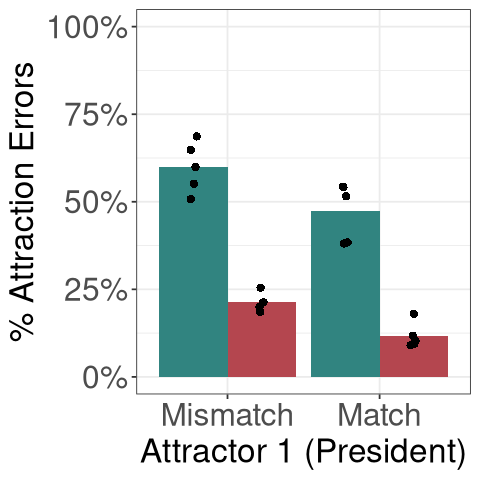

In [25]:
library(repr)
options(repr.plot.width=4, repr.plot.height=4)


plt <- ggplot(franck_lm_df, aes(x=inter_match, fill=local_match, y=sample/100)) +
geom_bar(stat="summary", position="dodge", fun=mean) + 
geom_point(data=means_lm, shape=16, size=2,
           position=position_jitterdodge(jitter.height=0, jitter.width = 0.1, dodge.width=0.9)) + 
#stat_summary(fun.data = mean_se, geom = "errorbar", position="dodge", color="black") +
labs(x="Attractor 1 (President)", 
     fill="Attractor 2 (Company)", y="% Attraction Errors") +
scale_fill_manual(labels=c("Mismatch", 
                        "Match"), values=pallete) +
scale_x_discrete(labels=c("Mismatch", 
                          "Match")) + 
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,1.0)) +
theme_bw() +
theme(axis.text.x=element_text(size=19), axis.text.y=element_text(size=19),
      axis.title.y=element_text(size=20), axis.title.x=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=19))
legend <- cowplot::get_legend(plt)
plt <- plt + theme(legend.position = "none") 

plt

ggsave("Franck_lm_wiki.png", width = 4, height = 4)

In [26]:
franck_lm <- glmmTMB(sample/100 ~ inter_match * local_match + (1 | item) 
                  + (1 | model), franck_lm_df, 
                   family=beta_family())
summary(franck_lm)
lm_eff <- summary(franck_lm)$coeff$cond[c("inter_match1", "local_match1"), 1]
lm_se <- summary(franck_lm)$coeff$cond[c("inter_match1", "local_match1"), 2]

lm_eff


Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


 Family: beta  ( logit )
Formula:          
sample/100 ~ inter_match * local_match + (1 | item) + (1 | model)
Data: franck_lm_df

     AIC      BIC   logLik deviance df.resid 
 -1553.0  -1516.9    783.5  -1567.0     1273 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.02838  0.1685  
 model  (Intercept) 0.04275  0.2068  
Number of obs: 1280, groups:  item, 32; model, 5

Overdispersion parameter for beta family (): 8.43 

Conditional model:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -0.6985352  0.0993814   -7.03 2.08e-12 ***
inter_match1               0.2562577  0.0202610   12.65  < 2e-16 ***
local_match1               0.8479778  0.0211654   40.06  < 2e-16 ***
inter_match1:local_match1 -0.0005342  0.0202011   -0.03    0.979    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

inter_match1 local_match1 
   0.2562577    0.8479778